In [65]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Placement.csv')

In [67]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0




preprocessing +EDA + Feature 
selection

Extract input and output column

scale the values

train test split

evalutate the model/model selection

deploy the model

In [68]:
df.head()
df.drop('Student_ID',1,inplace = True)

<ipython-input-68-b5206ca88fcf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Student_ID',1,inplace = True)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       100 non-null    float64
 1   IQ         100 non-null    int64  
 2   Placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [70]:
df.describe()

,CGPA,IQ,Placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [71]:
df.dtypes

CGPA         float64
IQ             int64
Placement      int64
dtype: object

In [72]:
df.isnull().sum()

CGPA         0
IQ           0
Placement    0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
# correlation

df.corr()

,CGPA,IQ,Placement
CGPA,1.000000,-0.098791,0.821688
IQ,-0.098791,1.000000,-0.083031
Placement,0.821688,-0.083031,1.000000


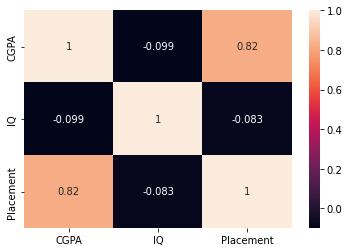

In [75]:
import seaborn as sns


sns.heatmap(df.corr(),annot = True)

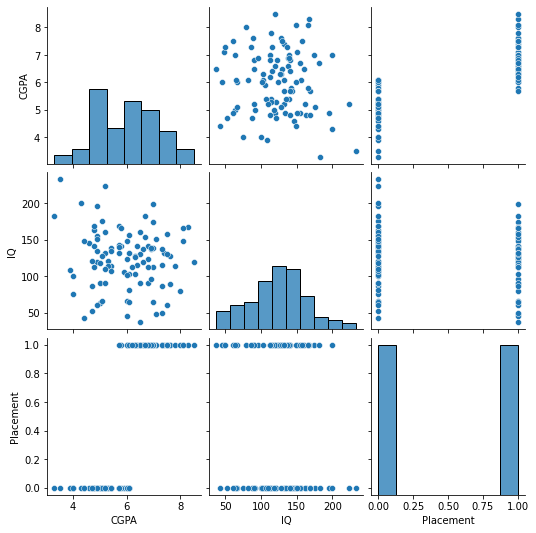

In [76]:
sns.pairplot(df)

In [77]:
df['Placement'].value_counts()

1    50
0    50
Name: Placement, dtype: int64

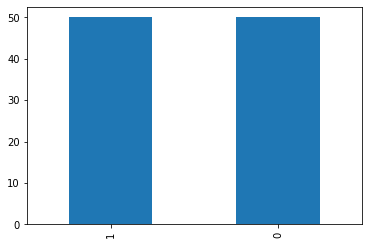

In [78]:
df['Placement'].value_counts().plot(kind = 'bar')

# no imbalance

In [79]:
# univariate anaysis

In [80]:
df_num=df.select_dtypes(exclude = 'object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


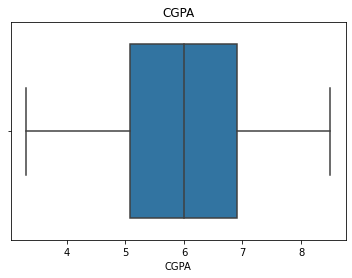

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


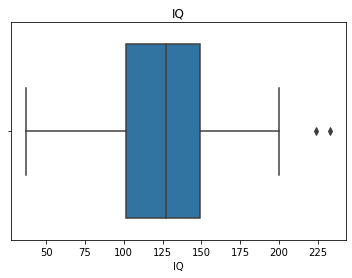

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


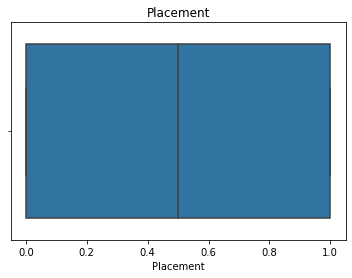

In [81]:
for i in df_num.columns:
  #sns.displot(df[i],kde = True)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()


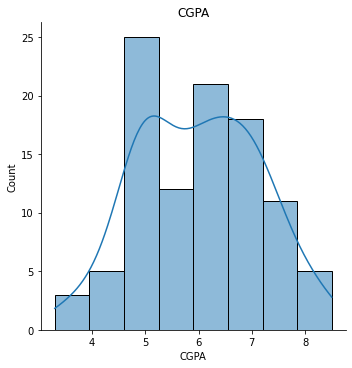

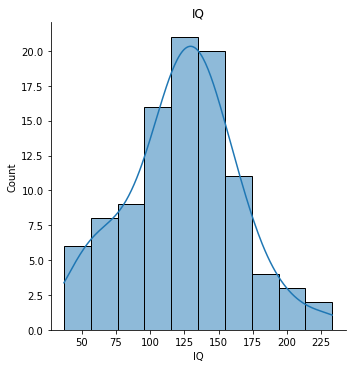

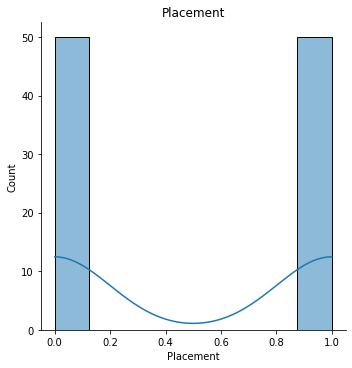

In [82]:
for i in df_num.columns:
  sns.displot(df[i],kde = True)
  #sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [83]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [84]:
X

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [85]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.33,random_state =121)

In [87]:
X_train

,CGPA,IQ
53,8.3,168
76,4.9,155
48,6.6,138
5,7.1,48
59,4.8,112
...,...,...
65,8.1,166
95,4.3,200
8,6.1,156
85,5.8,166


In [88]:
y_train

53    1
76    0
48    1
5     1
59    0
     ..
65    1
95    0
8     0
85    1
66    1
Name: Placement, Length: 67, dtype: int64

In [89]:
y_test

82    1
38    1
23    0
98    1
18    0
22    0
20    1
15    0
97    1
29    1
44    1
6     0
64    1
25    0
24    0
26    1
80    0
92    0
32    1
42    1
40    0
50    0
11    1
43    1
47    0
28    0
88    0
31    0
27    1
49    0
99    1
86    0
56    0
Name: Placement, dtype: int64

In [90]:
X_test

,CGPA,IQ
82,6.5,37
38,6.5,160
23,4.7,87
98,6.3,103
18,4.0,100
22,4.9,120
20,6.6,120
15,5.1,176
97,6.7,182
29,7.0,112


In [91]:
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()



In [92]:
X_train = scalar.fit_transform(X_train)

In [93]:
X_test = scalar.transform(X_test)

In [94]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred=clf.predict(X_test)

In [96]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [97]:
from sklearn.metrics import accuracy_score 


In [98]:
accuracy_score(y_test,y_pred)

0.9393939393939394

In [99]:
from mlxtend.plotting import plot_decision_regions


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


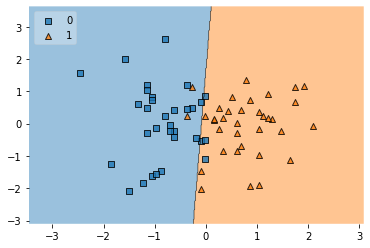

In [101]:
plot_decision_regions(X_train,y_train.values,clf = clf,legend =2)

In [102]:
import pickle

In [105]:
pickle.dump(clf,open('clf.pkl','wb'))

In [109]:
pickled_model=pickle.load(open('clf.pkl','rb'))

In [110]:
pickled_model.predict([[100,2]])

array([1])